In [56]:
import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


class example

In [4]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB

X_train = pd.read_csv("./IMDB dataset/X_train.csv").values
y_train = pd.read_csv("./IMDB dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./IMDB dataset/X_test.csv").values
y_test = pd.read_csv("./IMDB dataset/y_test.csv").values.ravel()

# Multinomial Naive Bayes (MNB)

In [5]:

mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)
y_predictions = mnb_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_predictions)

0.8322732909316373

### mnb methods

In [48]:
def grid_search_MNB(alphas):
    parameters = {'alpha': alphas}
    classifier = MultinomialNB()
    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    print("Best alpha: ", grid_search.best_params_['alpha'])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
    return grid_search


def graph_grid_search(grid_search):
    plt.title("MNB")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy (0 - 1)")

    # scores = [entry[1] for entry in grid_search.cv_results_['mean_test_score']]
    train_scores = grid_search.cv_results_["mean_train_score"]
    test_scores = grid_search.cv_results_["mean_test_score"]
    print(test_scores)
    # scores = np.array(scores).reshape(len(alphas), 1)
    plt.plot(alphas, train_scores, 'b')
    plt.plot(alphas, test_scores, 'r')
    # for index, value in enumerate(alphas):
    #     plt.plot(alphas[index], scores[index])
    plt.legend()
    # fig = plt.figure()
    plt.show()

## MNB parameter optimization
### MNB log 1 to 10000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best alpha:  0.3593813663804626
Accuracy:  0.8323132925317013
CPU times: user 41 s, sys: 8.9 s, total: 49.9 s
Wall time: 7.07 s
[0.83231351 0.83231351 0.83231351 0.83231351 0.83231351 0.83231351
 0.83231351 0.83231351 0.83243351 0.83239351]


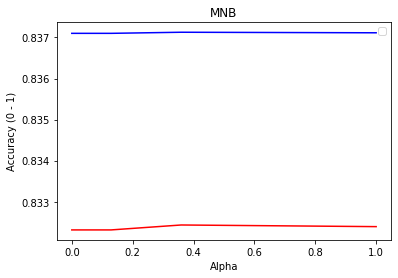

In [49]:
alphas = np.logspace(-4, 0, 10)

grid_search = % time grid_search_MNB(alphas)
graph_grid_search(grid_search)

### MNB log 0.1 to 100

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

Best alpha:  0.3469387755102041
Accuracy:  0.8323132925317013
CPU times: user 3min 27s, sys: 48.3 s, total: 4min 15s
Wall time: 36.4 s
[0.83231351 0.83231351 0.83231351 0.83231351 0.83231351 0.83231351
 0.83231351 0.83231351 0.83235351 0.83235351 0.83235351 0.83235351
 0.83235351 0.83235351 0.83235351 0.83235351 0.83239351 0.83243351
 0.83243351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351]


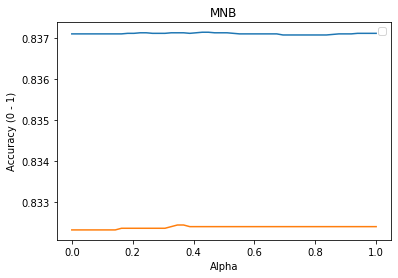

In [44]:
alphas = np.linspace(0, 1, 50)

grid_search = % time grid_search_MNB(alphas)
graph_grid_search(grid_search)

In [73]:
alphas = np.linspace(20, 22, 50)

% time grid_search_MNB(alphas)

Best alpha:  20.122448979591837
Accuracy:  0.8320332813312532
CPU times: user 1min 53s, sys: 1min 3s, total: 2min 57s
Wall time: 30.8 s


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


1000
ingored:  0


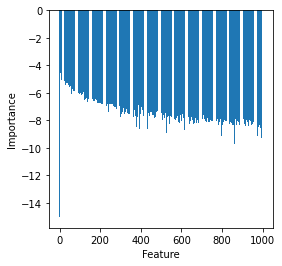

1.0000000000000013

In [47]:

mnb_classifier = MultinomialNB(alpha=0.336734693877551)
mnb_classifier.fit(X_train, y_train)
importance = mnb_classifier.coef_[0]
print(len(importance))
print("ingored: ", (importance == 0).sum())

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
sum([np.exp(1) ** x for x in mnb_classifier.coef_[0]])

In [90]:

mnb_classifier = MultinomialNB(alpha=0.3469387755102041)
mnb_classifier.fit(X_train, y_train)

y_predictions = mnb_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_predictions))

# y_predictions = mnb_classifier.predict(X_train)
# print(metrics.accuracy_score(y_train, y_predictions))

misclassified_indices = np.where((y_predictions != y_test))[0]
print(len(y_test))
print(len(misclassified_indices))

k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

print(y_test[misclassified_indices[0]])
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(3):
    columns += ["Neigbor#{}_idx".format(i + 1), "Neigbor#{}_True Class".format(i + 1),
        "Neigbor#{}_Distance".format(i + 1)]

print(columns)
df = pd.DataFrame(columns=columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] = y_test[misclassified_indices]
df["Pred Class"] = y_predictions[misclassified_indices]
for i in range(3):
    df["Neigbor#{}_idx".format(i + 1)] = indices[:, i]
    df["Neigbor#{}_True Class".format(i + 1)] = y_train[indices[:, i]]
    df["Neigbor#{}_Distance".format(i + 1)] = np.around(distances[:, i], decimals=2)

df

0.8323132925317013
24999
4192
1.0
['Misclassified Test idx', 'True Class', 'Pred Class', 'Neigbor#1_idx', 'Neigbor#1_True Class', 'Neigbor#1_Distance', 'Neigbor#2_idx', 'Neigbor#2_True Class', 'Neigbor#2_Distance', 'Neigbor#3_idx', 'Neigbor#3_True Class', 'Neigbor#3_Distance']


,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,3,1.0,0.0,10769,1.0,7.14,14151,1.0,7.21,15028,0.0,7.28
1,4,1.0,0.0,22376,1.0,7.28,18830,0.0,7.35,22542,0.0,7.35
2,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
3,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
4,24,1.0,0.0,14985,0.0,10.20,2536,0.0,10.30,8644,1.0,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,24979,1.0,0.0,418,1.0,8.00,17909,1.0,8.06,9761,0.0,8.12
4188,24984,1.0,0.0,10769,1.0,6.08,13509,1.0,6.40,2176,1.0,6.48
4189,24987,1.0,0.0,22526,0.0,8.60,5663,1.0,8.66,18830,0.0,8.66
4190,24992,0.0,1.0,13878,0.0,5.00,4695,0.0,5.20,14169,1.0,5.29


# Random Forest

In [77]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    random_state=12,
    max_features=31
)
% time random_forest.fit(X_train, y_train)
print("Accuracy on training: {:3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(random_forest.score(X_test, y_test)))
random_forest.n_features_

CPU times: user 13.4 s, sys: 182 ms, total: 13.6 s
Wall time: 13.7 s
Accuracy on training: 1.000000
Accuracy on test: 0.825993


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1000

In [82]:
import sklearn_evaluation


def grid_search_random_forest(
        n_estimators,
        max_features
):
    parameters = {
        'n_estimators': n_estimators,
        'max_features': max_features
    }
    classifier = RandomForestClassifier(
        random_state=2
    )
    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,
    )
    grid_search.fit(X_train, y_train)
    print("Best n_estimators: ", grid_search.best_params_['n_estimators'])
    print("Best max_features: ", grid_search.best_params_['max_features'])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
    return grid_search


def graph_grid_search_random_forest(grid_search):
    plt.title("Random Forest")
    plt.xlabel("n_estimators")
    plt.ylabel("max_features")

    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=("n_estimators", "max_features")
    )

    # for index, value in enumerate(alphas):
    #     plt.plot(alphas[index], scores[index])
    plt.legend()
    # fig = plt.figure()
    plt.show()

In [80]:
n_estimators = np.linspace(40, 100, 3, dtype=int)
max_features = np.linspace(1, 35, 5, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  100
Best max_features:  26
Accuracy:  0.8260330413216529
CPU times: user 5min 8s, sys: 4.21 s, total: 5min 12s
Wall time: 5min 13s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


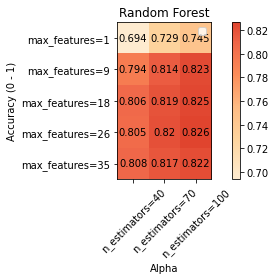

In [81]:
graph_grid_search_random_forest(grid_search)

In [83]:
n_estimators = np.linspace(80, 120, 3, dtype=int)
max_features = np.linspace(21, 31, 5, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  120
Best max_features:  23
Accuracy:  0.829193167726709
CPU times: user 9min 16s, sys: 8.25 s, total: 9min 24s
Wall time: 9min 25s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


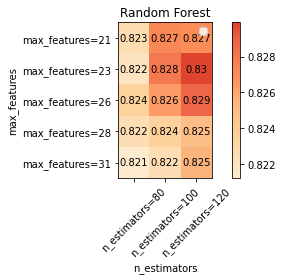

In [87]:
graph_grid_search_random_forest(grid_search)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


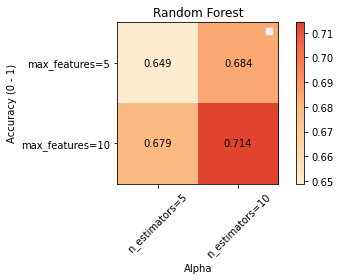

In [77]:
graph_grid_search_random_forest(grid_search)

In [79]:
rf = RandomForestClassifier(
    n_estimators=5,
    max_features=5,
    random_state=2
)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
random_forest.feature_importances_
plt.bar(
    range(0, 1000),
    random_forest.feature_importances_,
)
plt.ylabel('importance')
plt.xlabel('feature')
plt.show()

0.6521460858434337


NameError: name 'random_forest' is not defined

# Gradient Boost Random Tree GBRT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))

In [33]:
gbrt = GradientBoostingClassifier(
    random_state=0,
    max_depth=1,
)
% time gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(
    random_state=0,
    max_depth=3,
)
% time gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(
    random_state=0,
    max_depth=5,
)
% time gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))

CPU times: user 9.59 s, sys: 288 ms, total: 9.87 s
Wall time: 9.92 s
Accuracy on training: 0.765991
Accuracy on test: 0.766311
CPU times: user 29.9 s, sys: 380 ms, total: 30.3 s
Wall time: 30.5 s
Accuracy on training: 0.823673
Accuracy on test: 0.812953
CPU times: user 53.7 s, sys: 402 ms, total: 54.1 s
Wall time: 54.2 s
Accuracy on training: 0.870035
Accuracy on test: 0.827433


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(
    random_state=0,
    learning_rate=0.01
)
% time gbrt.fit(X_train, y_train)

print("Accuracy on training: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(gbrt.score(X_test, y_test)))
print(gbrt.get_params()['n_estimators'])

CPU times: user 30.1 s, sys: 424 ms, total: 30.5 s
Wall time: 30.6 s
Accuracy on training: 0.696388
Accuracy on test: 0.697788
100


In [ ]:

def plot_feature_importances(model):
    n_features = X_train.data.shape[1]
    plt.barh(
        range(n_features),
        model.feature_importances_,
        align='center'
    )
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")


plot_feature_importances(gbrt)

In [85]:
def cross_validate_gradient(n_estimators, learning_rates, max_depths):
    parameters = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rates,
        'max_depth': max_depths,
    }
    classifier = GradientBoostingClassifier()
    grid_search = GridSearchCV(classifier, parameters, cv=4)
    grid_search.fit(X_train, y_train)
    print("Best n_estimators: ", grid_search.best_params_['n_estimators'])
    print("Best learning_rate: ", grid_search.best_params_['learning_rate'])
    print("Best max_depth: ", grid_search.best_params_['max_depth'])
    print("Accuracy on training: {:3f}".format(grid_search.score(X_train, y_train)))
    print("Accuracy on test: {:3f}".format(grid_search.score(X_test, y_test)))
    return grid_search

In [38]:
# n_estimators = np.linspace(90, 100, 2, dtype=int)
n_estimators = [100]
learning_rates = [0.1, 0.5, 0.9]
max_depths = [3, 4, 5]

% time cross_validate_gradient(n_estimators, learning_rates, max_depths)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
n_estimators = [10, 20, 30]
learning_rates = np.linspace(0, 1, 10)
max_depths = np.linspace(1, 10, 5)
grid_search_gbrt = %time cross_validate_gradient(n_estimators, learning_rates, max_depths)

In [42]:
print("hi")

hi
